<a href="https://colab.research.google.com/github/TheLadyJack/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/Copy_of_LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 102kB 3.7MB/s 
     |████████████████████████████████| 194kB 4.7MB/s 
     |████████████████████████████████| 10.4MB 59.4MB/s 
     |████████████████████████████████| 614kB 45.8MB/s 
     |████████████████████████████████| 1.5MB 38.0MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 256kB 52.7MB/s 
     |████████████████████████████████| 307kB 51.7MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 215kB 53.6MB/s 
     |████████████████████████████████| 747kB 41.3MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=8a61afe47ddc86b90e49f69fd5cbca74d5f7a89bd8eb0958e4af8d2b8c7c8ffa
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=21)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [15]:
train.head

ImportError: ignored

          id  amount_tsh  ... waterpoint_type_group             status_group
6238   65917        30.0  ...    communal standpipe               functional
56171   8156         0.0  ...                 other           non functional
1713   73471         0.0  ...                 other           non functional
18126  44352      2000.0  ...    communal standpipe               functional
17419  38213         0.0  ...             hand pump  functional needs repair
48211  59242         0.0  ...             hand pump  functional needs repair
6050   64630         0.0  ...    communal standpipe           non functional
37395  47253         0.0  ...    communal standpipe               functional
43140  41837      1000.0  ...    communal standpipe               functional
28334  70757         0.0  ...             hand pump           non functional

[10 rows x 41 columns]

In [10]:
import matplotlib as plt


ImportError: ignored

          id  amount_tsh  ... waterpoint_type_group             status_group
6238   65917        30.0  ...    communal standpipe               functional
56171   8156         0.0  ...                 other           non functional
1713   73471         0.0  ...                 other           non functional
18126  44352      2000.0  ...    communal standpipe               functional
17419  38213         0.0  ...             hand pump  functional needs repair
...      ...         ...  ...                   ...                      ...
10615  71707    117000.0  ...    communal standpipe               functional
14119  56850        20.0  ...    communal standpipe               functional
40816   2624         0.0  ...             hand pump           non functional
1081   58115         0.0  ...    communal standpipe           non functional
9461   19200         0.0  ...    communal standpipe               functional

[47520 rows x 41 columns]

In [7]:
# Check Pandas Profiling version
import pandas_profiling
pandas_profiling.__version__

ImportError: ignored

In [9]:
# Old code for Pandas Profiling version 2.3
# It can be very slow with medium & large datasets.
# These parameters will make it faster.

# profile = train.profile_report(
#     check_correlation_pearson=False,
#     correlations={
#         'pearson': False,
#         'spearman': False,
#         'kendall': False,
#         'phi_k': False,
#         'cramers': False,
#         'recoded': False,
#     },
#     plot={'histogram': {'bayesian_blocks_bins': False}},
# )
#

# New code for Pandas Profiling version 2.4
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

ImportError: ignored

In [8]:
train.describe(include='all')


ImportError: ignored

                  id     amount_tsh  ... waterpoint_type_group status_group
count   47520.000000   47520.000000  ...                 47520        47520
unique           NaN            NaN  ...                     6            3
top              NaN            NaN  ...    communal standpipe   functional
freq             NaN            NaN  ...                 27682        25807
mean    37035.824137     319.301209  ...                   NaN          NaN
std     21476.616619    2823.906559  ...                   NaN          NaN
min         3.000000       0.000000  ...                   NaN          NaN
25%     18364.750000       0.000000  ...                   NaN          NaN
50%     37001.500000       0.000000  ...                   NaN          NaN
75%     55590.250000      25.000000  ...                   NaN          NaN
max     74247.000000  250000.000000  ...                   NaN          NaN

[11 rows x 41 columns]

In [0]:
train['status_group'].value_counts(normalize=True)
#Here is our baselines for classificatrion. If we guessed all to be functional we'd be right 54% of the time
#or more specifically, if we replaced every pump we'd be doing redundant work 54% of the time

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [0]:
target = 'status_group'

train_features = train.drop(columns=[target, 'id'])

numeric_features = train_features.select_dtypes(include='number').columns.tolist()

cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 50].index.tolist()

features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(min_samples_leaf=10, random_state=21)
)

pipeline.fit(X_train, y_train)

print ('Train Accuracy', pipeline.score(X_train, y_train))
print ('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.8384048821548822
Validation Accuracy 0.7711279461279461


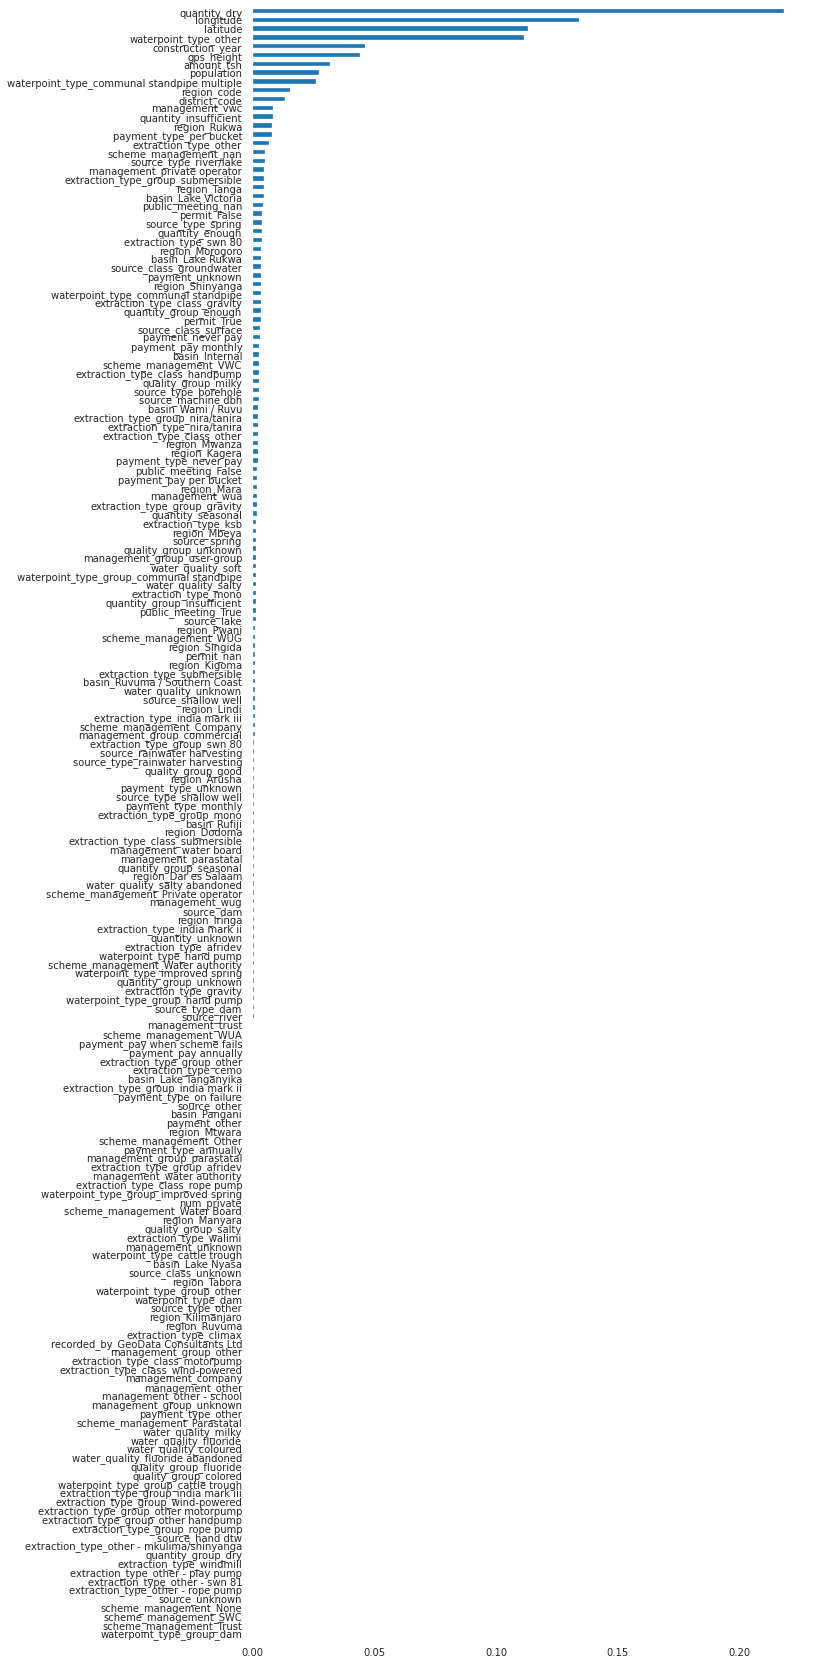

In [0]:
import matplotlib.pyplot as plt
model = pipeline.named_steps['decisiontreeclassifier']

encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)

plt.figure(figsize=(10,30))
importances.sort_values().plot.barh()
plt.show()

In [0]:
from google.colab import files
df = X_test
df['status_group'] = pipeline.predict(X_test)
df = pd.DataFrame(df)

df.to_csv('Maxine_prediction.csv')
files.download('Maxine_prediction.csv')
#this is very messy and I don't like it.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin,region,public_meeting,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,0.0,1996,35.290799,-4.059696,0,21,3,321,2012,Internal,Manyara,True,GeoData Consultants Ltd,Parastatal,True,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,non functional
1,0.0,1569,36.656709,-3.309214,0,2,2,300,2000,Pangani,Arusha,True,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,0.0,1567,34.767863,-5.004344,0,13,2,500,2010,Internal,Singida,True,GeoData Consultants Ltd,VWC,NaN,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,functional
3,0.0,267,38.058046,-9.418672,0,80,43,250,1987,Ruvuma / Southern Coast,Lindi,NaN,GeoData Consultants Ltd,VWC,True,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,non functional
4,500.0,1260,35.006123,-10.950412,0,10,3,60,2000,Ruvuma / Southern Coast,Ruvuma,NaN,GeoData Consultants Ltd,Water Board,True,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional



## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

